In [4]:
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import lernnavi_preprocess as pp

rows = pp.load_mastery_array()
mastery_df_german, mastery_df_math = pp.get_mastery_dfs(rows)

---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---


Parsing mastery levels...:   0%|          | 0/1093791 [00:00<?, ?it/s]

---Starting dataframe creation---
	-->Creating the initial dataframe...
		Initial dataframe created
	-->Starting feature extension, merging tables...
		Tables merged
	-->Finding weekly questions solved...
		Weekly questions solved found
	-->Finding weekly correct questions solved...
		Weekly correct questions solved found
	-->Finding weekly partially correct questions solved...
		Weekly partially correct questions solved found
	-->Finding weekly review task count...
		Weekly review task count found
	-->Finding weekly view count...
		Weekly view count found
	-->Finding weekly window visible ratio...
		Weekly window visible ratio found
	-->Constructing the final dataframes...
		Final dataframes constructed
---Dataframe creation finished! ---


In [1]:
from tqdm import notebook as vis

In [2]:
import cluster

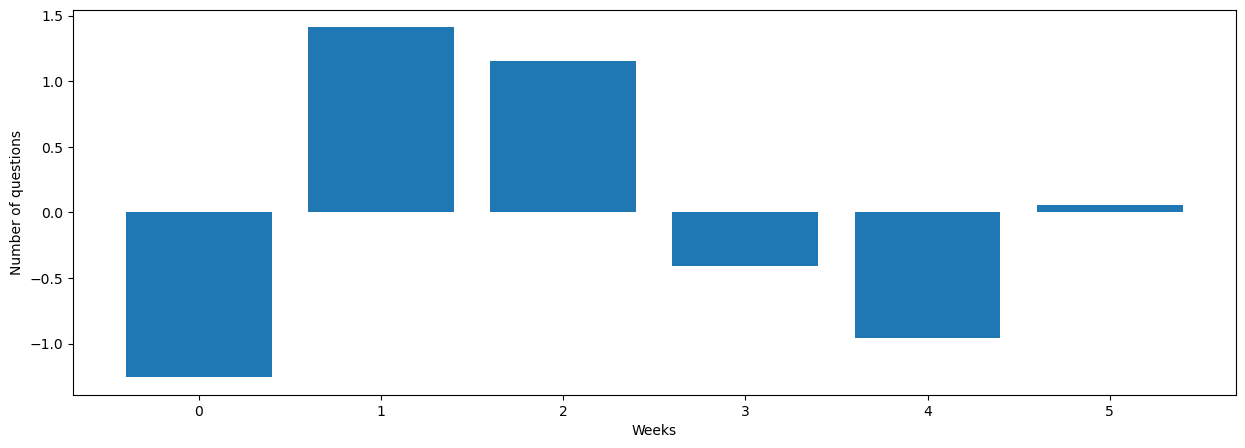

In [5]:
user_ids_german, data_german = cluster.prepare_data(students=mastery_df_german,min_week=6, scale = True)
cluster.visualize_data(data_german[len(data_german)-1]) # We visualize one student's data

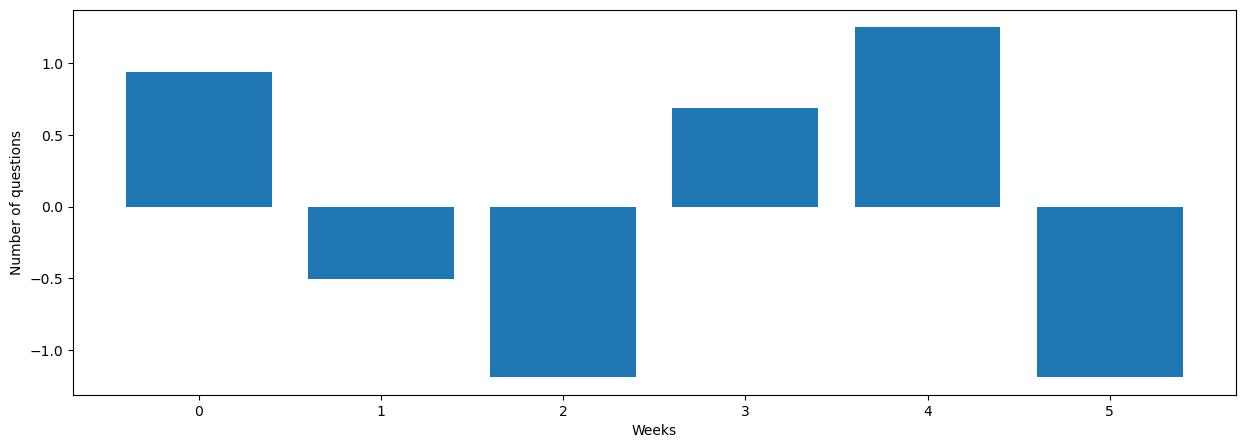

In [6]:
user_ids_math, data_math = cluster.prepare_data(students=mastery_df_math,min_week=6, scale = True)
cluster.visualize_data(data_math[len(data_math)-1]) # We visualize one student's data

In [10]:
print(data_german.shape)
print("__________________________")
data_german

(1024, 6)
__________________________


array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798,
        -0.4472136 ],
       [-0.48087792, -0.8014632 , -0.41676087,  0.48087792,  2.01968728,
        -0.8014632 ],
       [ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       ...,
       [-0.71316586,  2.0750826 ,  0.30827169, -0.24385671, -0.79598512,
        -0.6303466 ],
       [-0.82230257,  1.883932  ,  0.17182442, -1.31936606,  0.02454635,
         0.06136586],
       [-1.2560152 ,  1.41125304,  1.15722749, -0.40926338, -0.95965206,
         0.05645012]])

In [11]:
len(user_ids_german)

1024

## WARNING START
##      BELOW CELLS TAKE A REALLY LONG TIME TO RUN!!!!
### (They create the images under the ./images folder)
## For german

In [7]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  1


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

window:  2


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

In [8]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  3


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  4


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [9]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  5


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  6


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [73]:
D = cluster.get_distance_matrix(data, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

## For math

In [12]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  1


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

window:  2


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

In [13]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  3


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  4


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [15]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  5


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  6


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [16]:
D = cluster.get_distance_matrix(data_math, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[6.87960595e-15 3.58682989e-06 1.87169283e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[6.01556455e-15 3.08607629e-06 1.25651095e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 1585 with accuracies 
[5.09464238e-15 1.41002076e-06 2.09452916e-05 1.94439519e-05
 9.93071234e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[

## WARNING END

In [7]:
import pandas as pd
def get_original_rows(user_ids, labels, original_df, min_weeks=6):
    """
    This function is used to get the non-scaled version of the data, in the case that cluster.prepare_data() function
    was used with scaled=True
    """
    temp = original_df.merge(pd.DataFrame({'user_id': user_ids, 'cluster': labels}), on='user_id', how='inner')
    temp = temp[temp['weeks_since_first_transaction'] < min_weeks]
    temp = (temp.sort_values(['user_id', 'weeks_since_first_transaction'], ascending=True)
                .groupby('user_id')
                .agg({'num_questions': lambda x: list(x)}))
    temp = temp[temp['num_questions'].apply(lambda x: sum(x)) > 0]
    temp.reset_index(inplace=True)
    temp = np.asarray(temp.num_questions.values.tolist())
    return temp

In [10]:
windows = [0,1,2,3,4,5,6]
#For german
D_for_window_german = {
    window: cluster.get_distance_matrix(data_german, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_german, metric='e') for window in windows
}
#For math
D_for_window_math = {
    window: cluster.get_distance_matrix(data_math, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_math, metric='e') for window in windows
}

Number of clusters: 4, Label Length: 1024
Group 0 has 165 students
Group 1 has 194 students
Group 2 has 176 students
Group 3 has 489 students


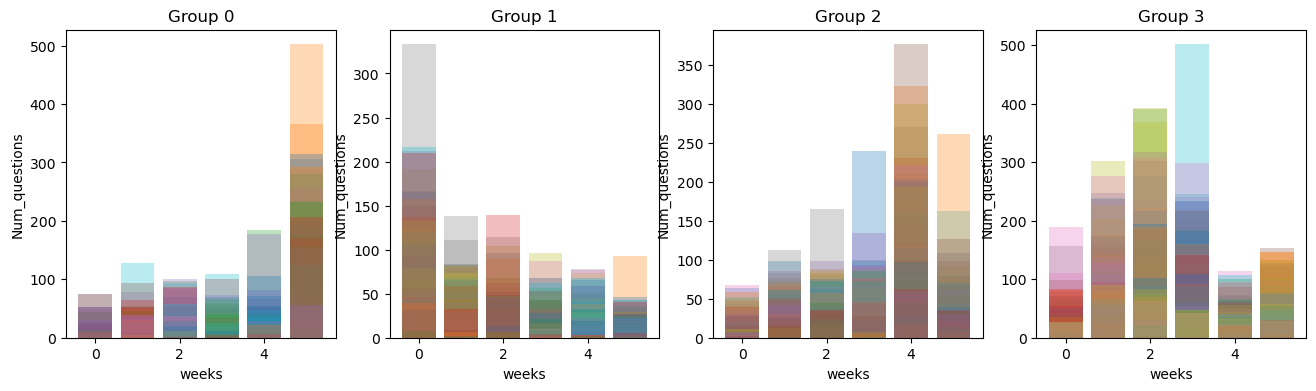

In [12]:
#GERMAN
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_german[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)

Number of clusters: 4, Label Length: 733
Group 0 has 100 students
Group 1 has 257 students
Group 2 has 88 students
Group 3 has 288 students


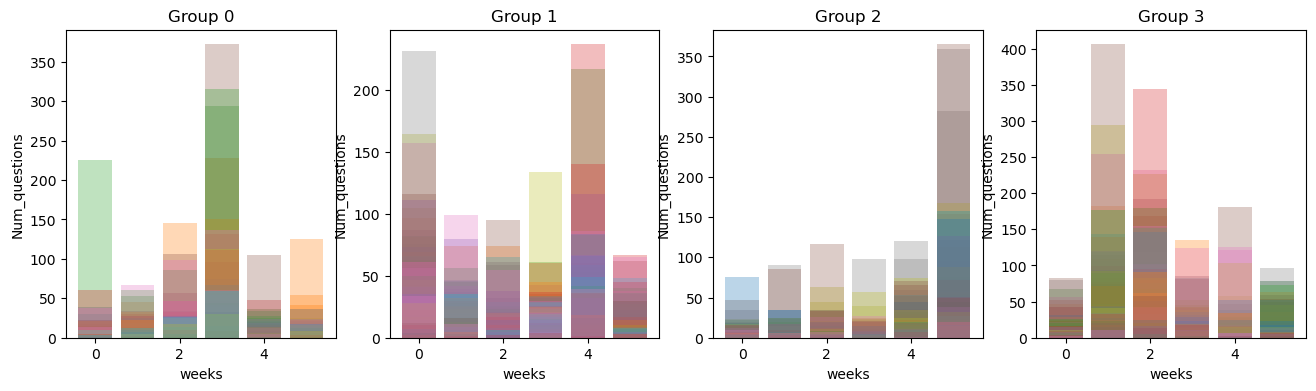

In [13]:
#MATH
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_math[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)

window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 167 students
Group 1 has 667 students
Group 2 has 190 students


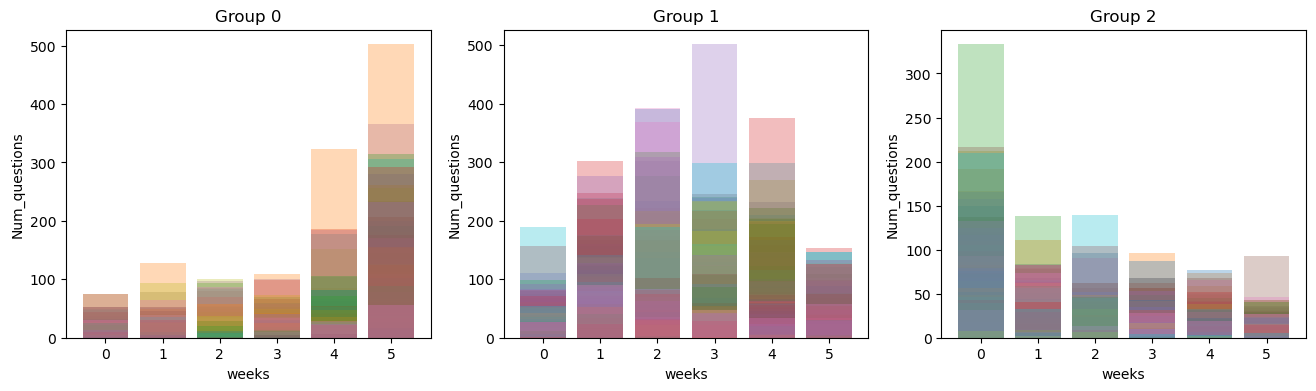

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 668 students
Group 1 has 166 students
Group 2 has 190 students


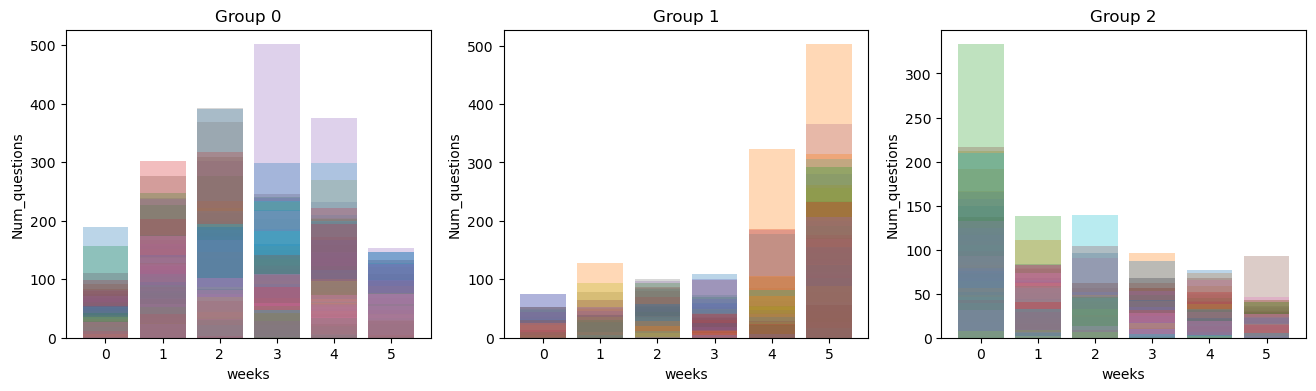

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


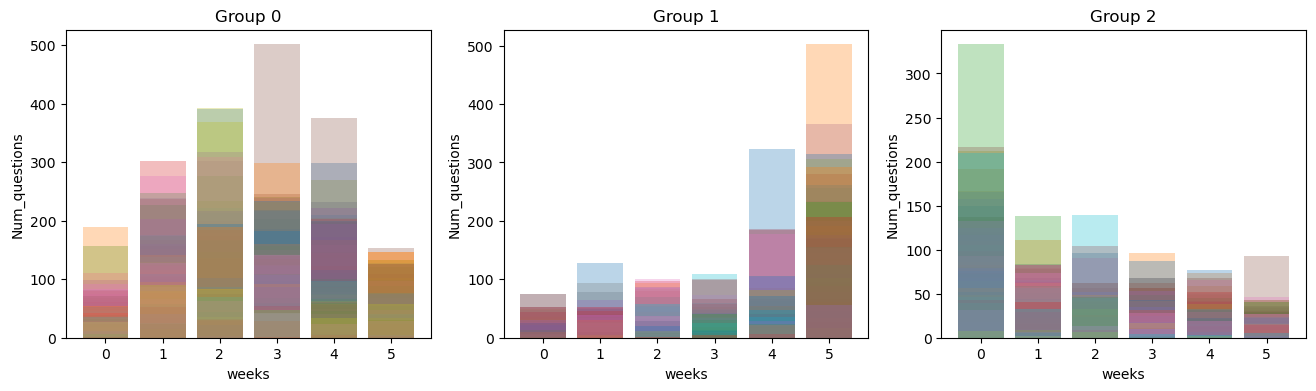

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


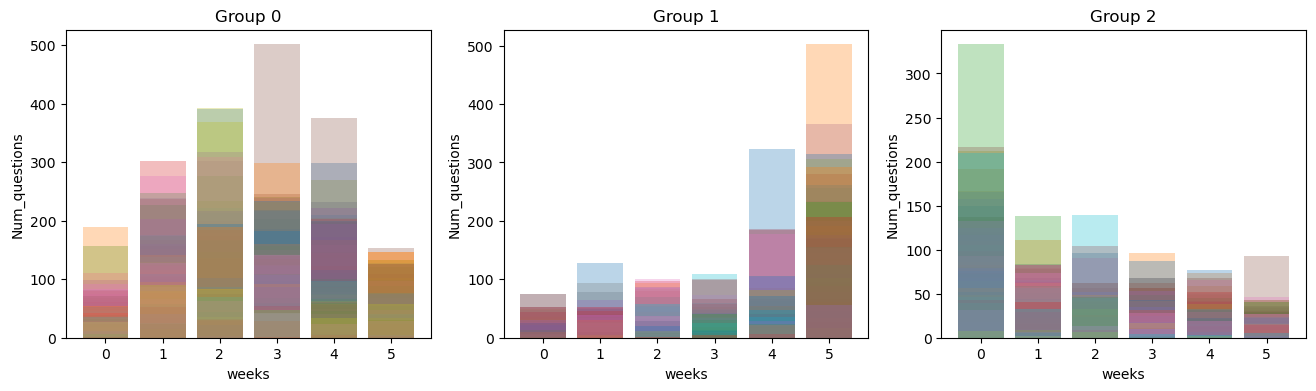

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


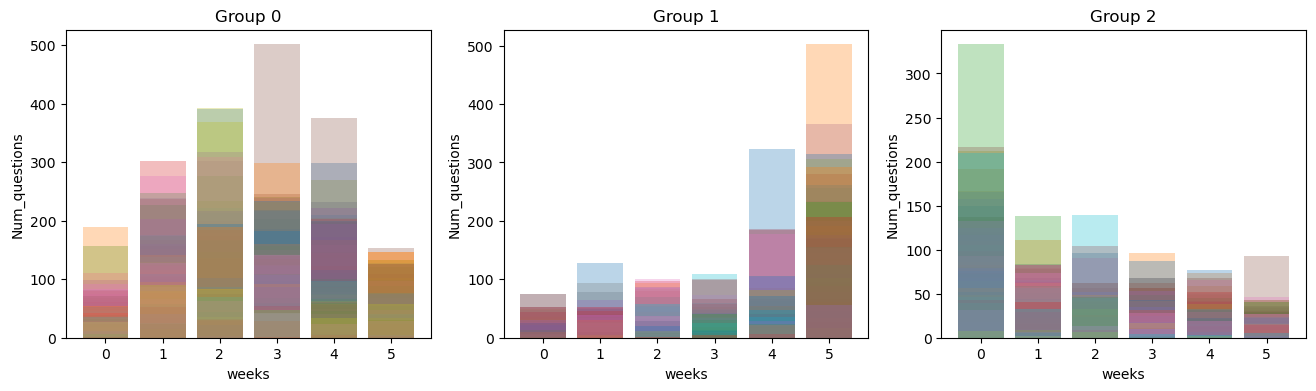

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


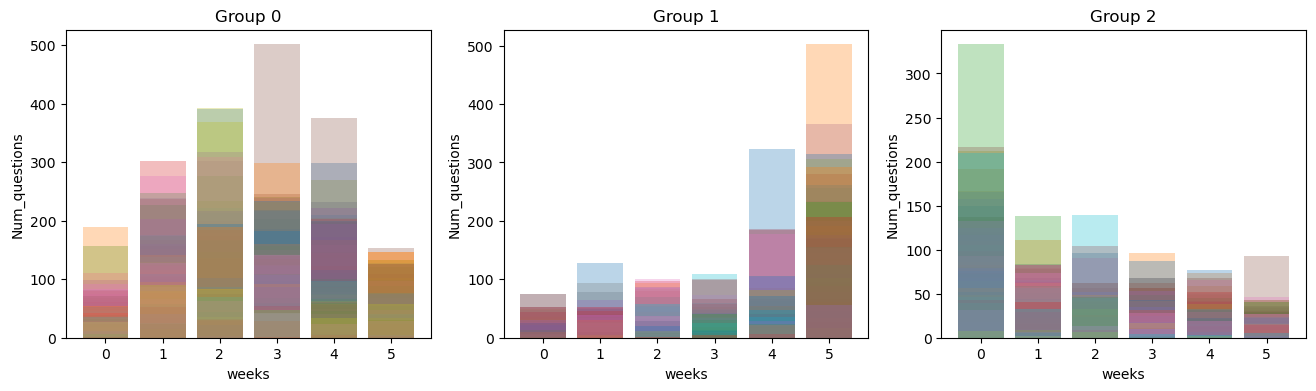

_________________________________________________________


In [15]:
#GERMAN
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 82 students
Group 2 has 184 students


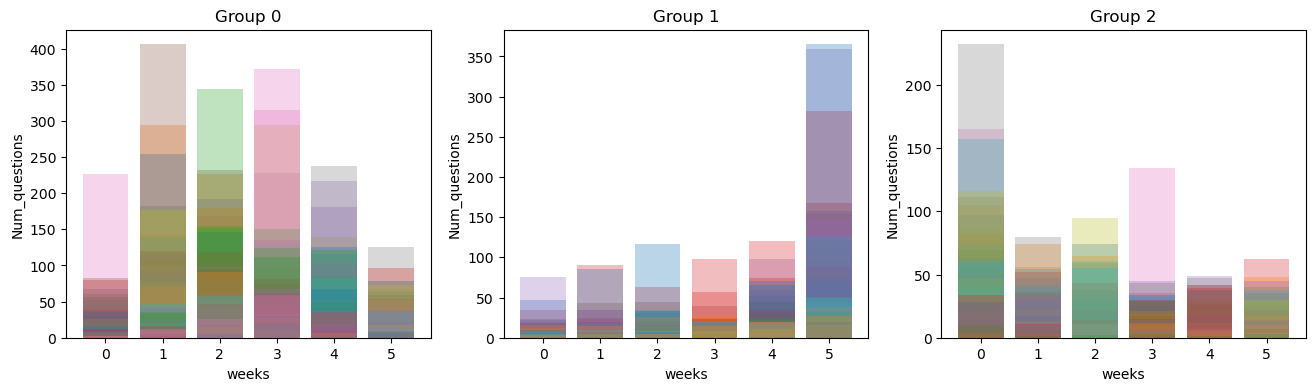

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


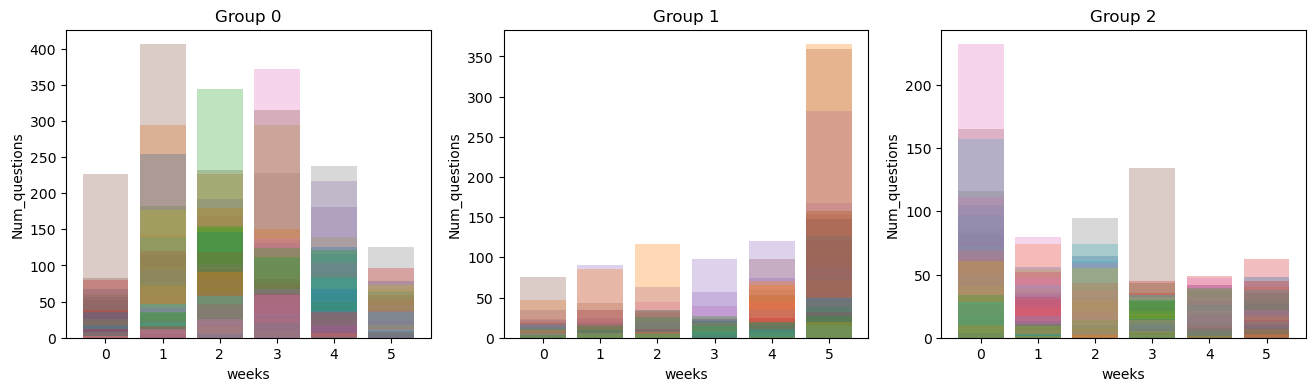

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


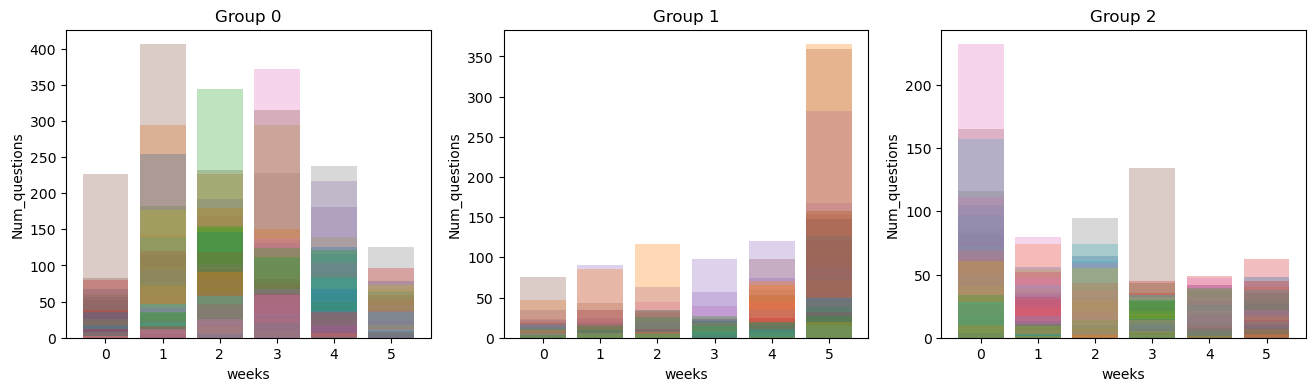

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


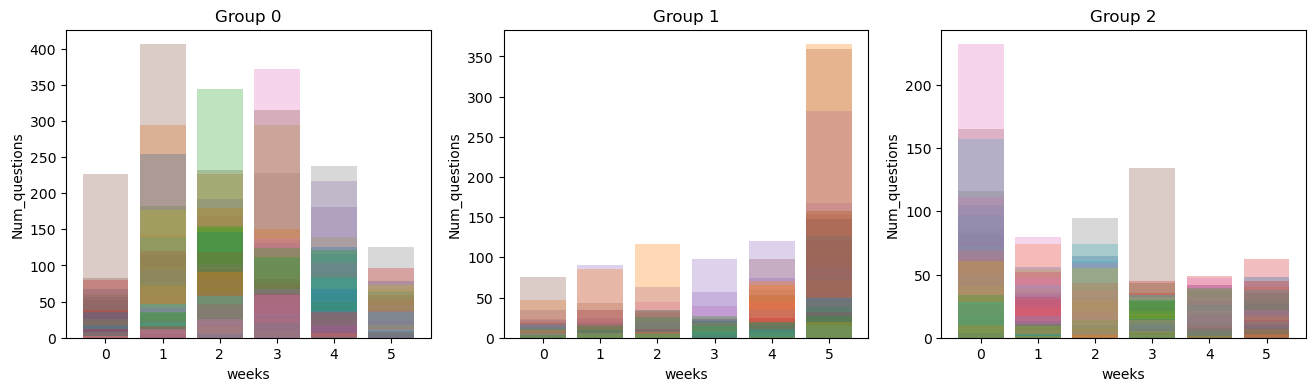

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


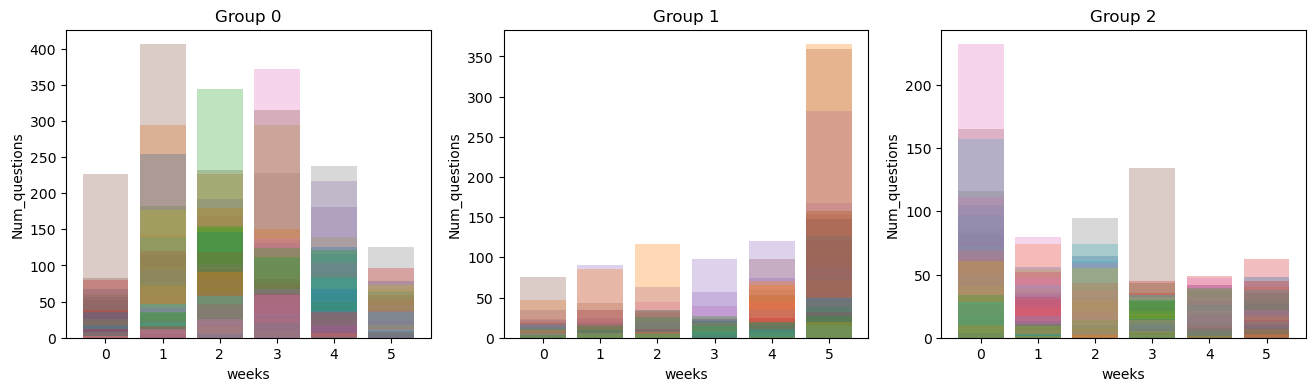

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


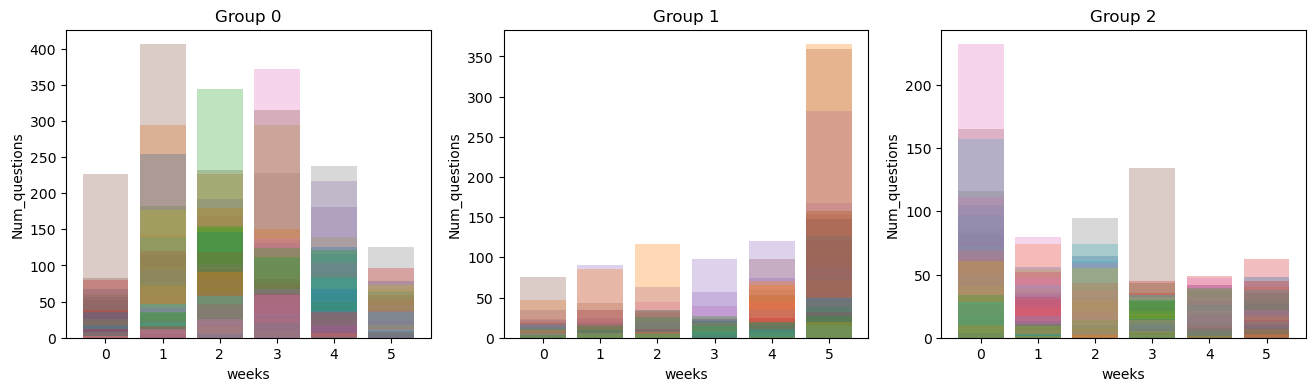

_________________________________________________________


In [17]:
#MATH
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 542 students
Group 1 has 289 students
Group 2 has 193 students


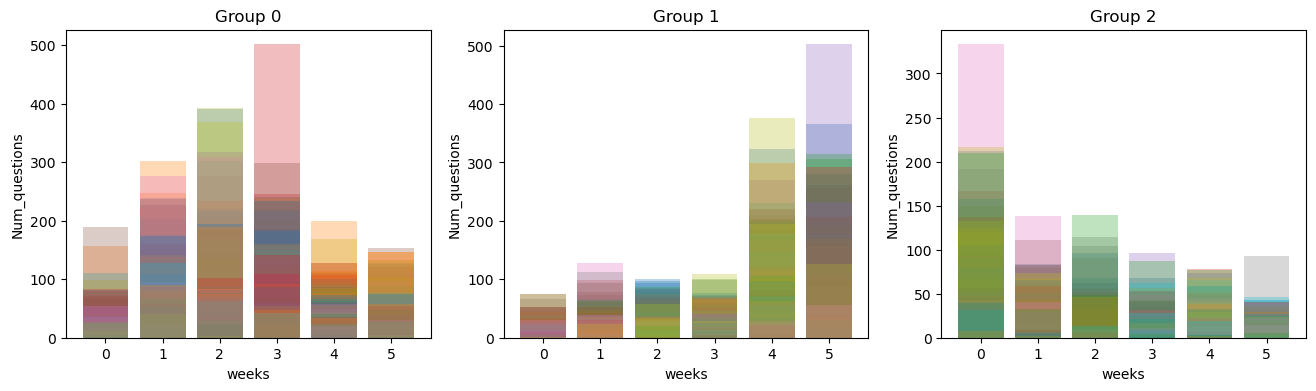

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 655 students
Group 1 has 171 students
Group 2 has 198 students


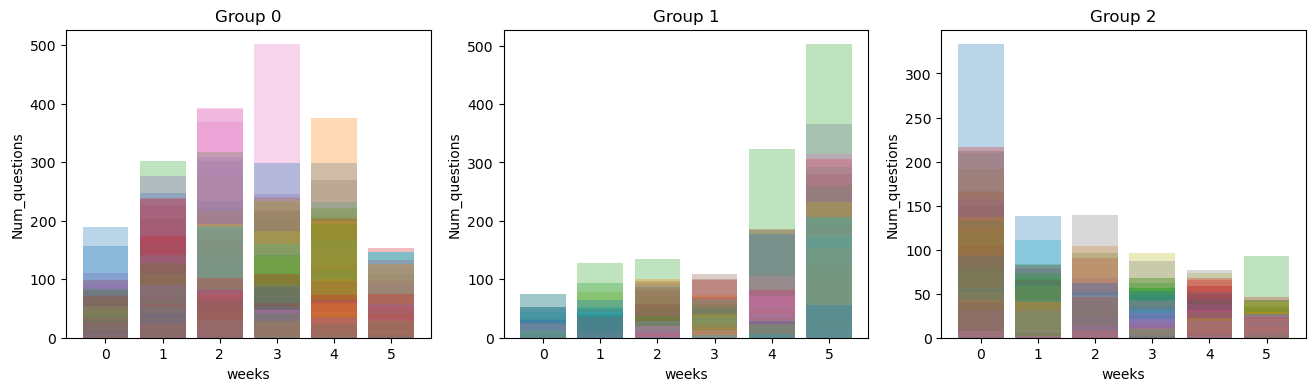

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 654 students
Group 1 has 174 students
Group 2 has 196 students


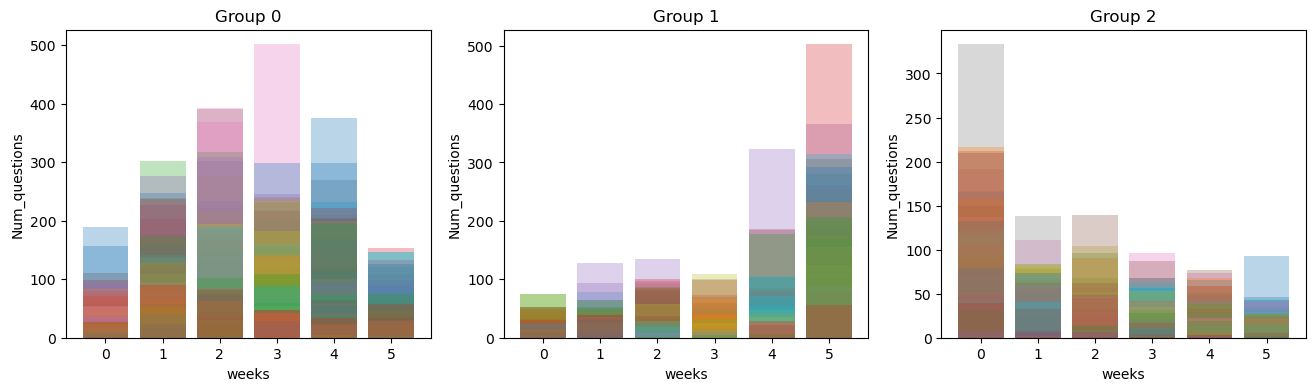

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


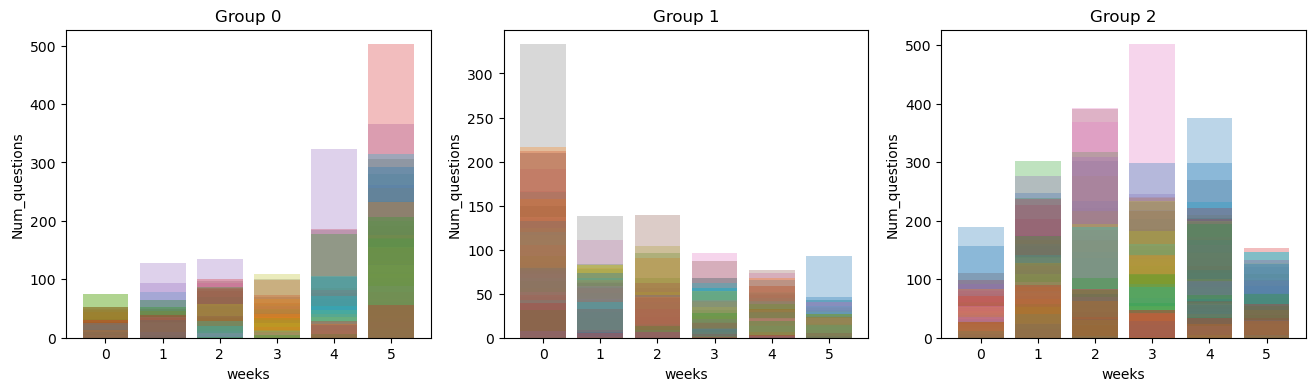

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


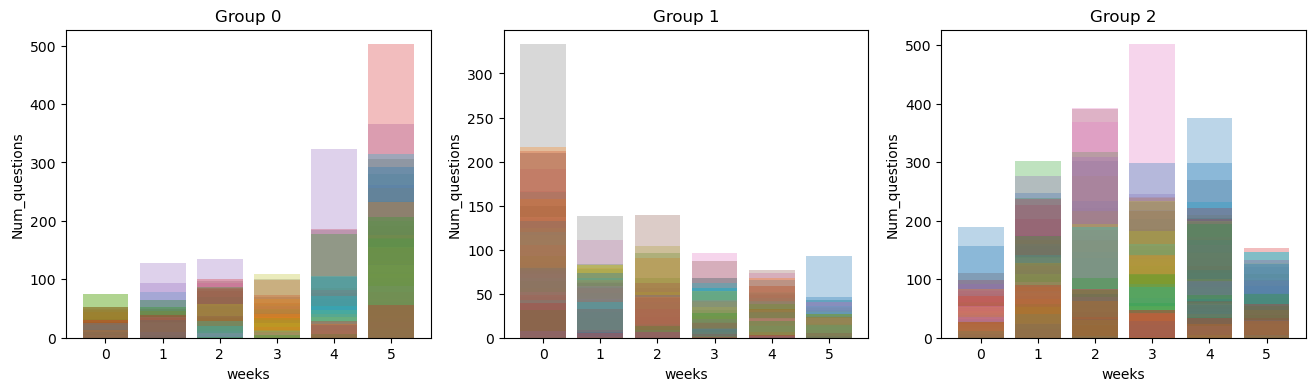

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


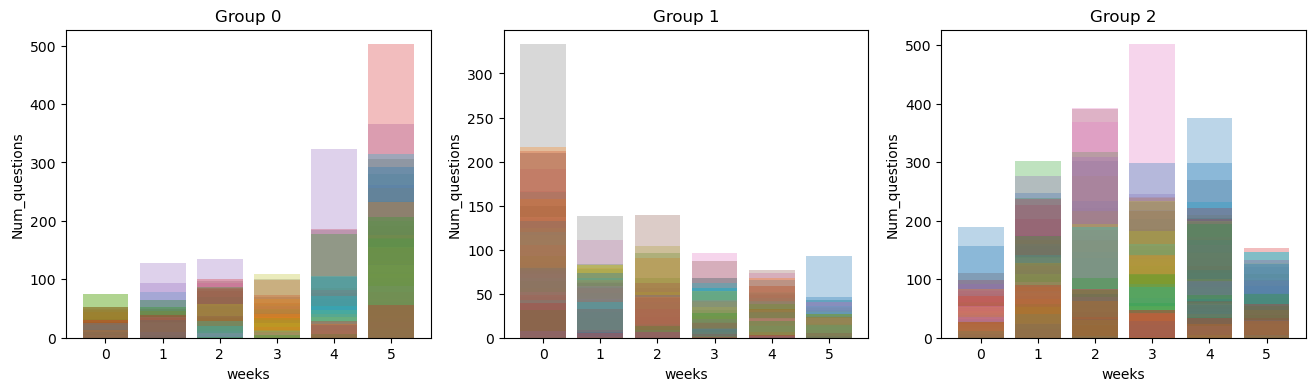

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


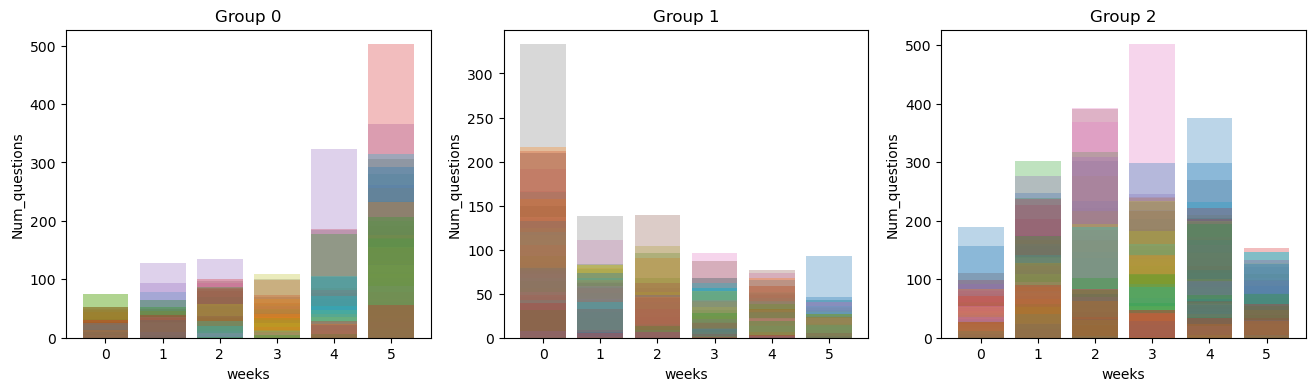

_________________________________________________________


In [18]:
#GERMAN
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 350 students
Group 1 has 298 students
Group 2 has 85 students


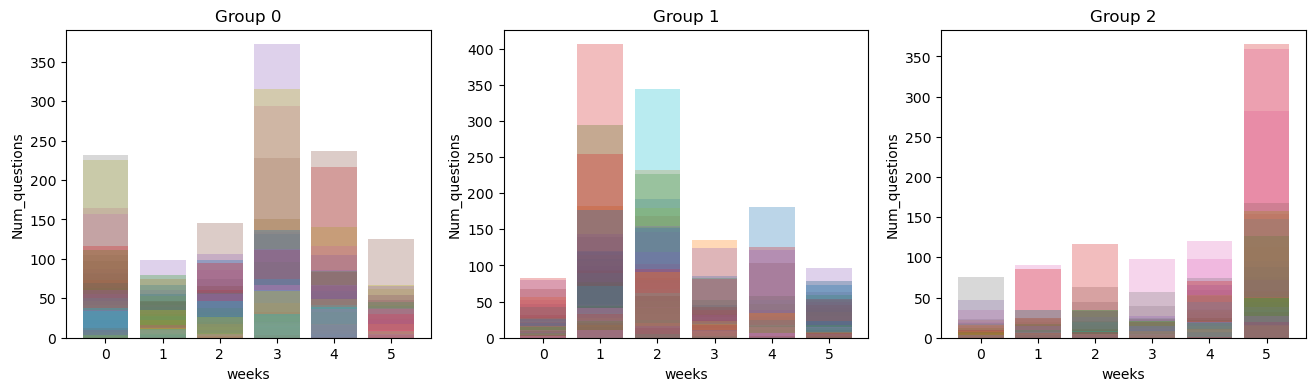

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 471 students
Group 1 has 186 students
Group 2 has 76 students


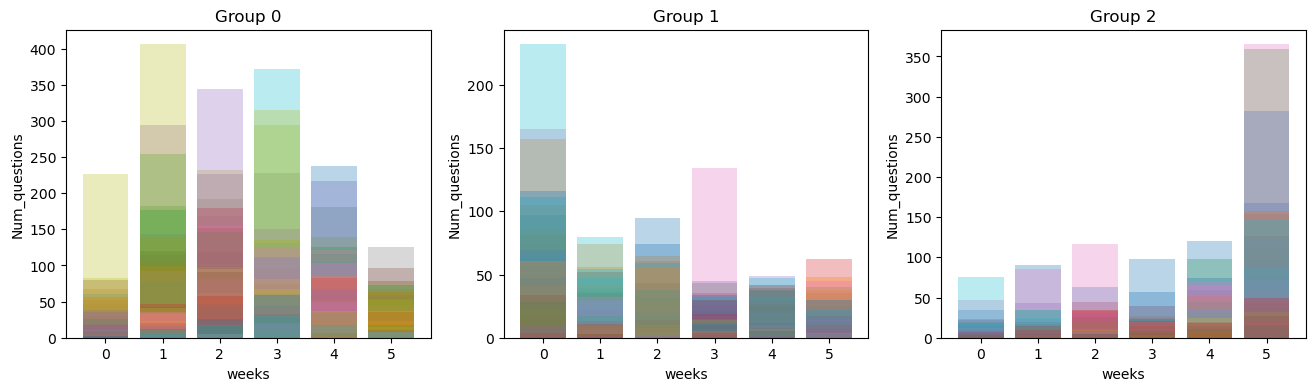

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


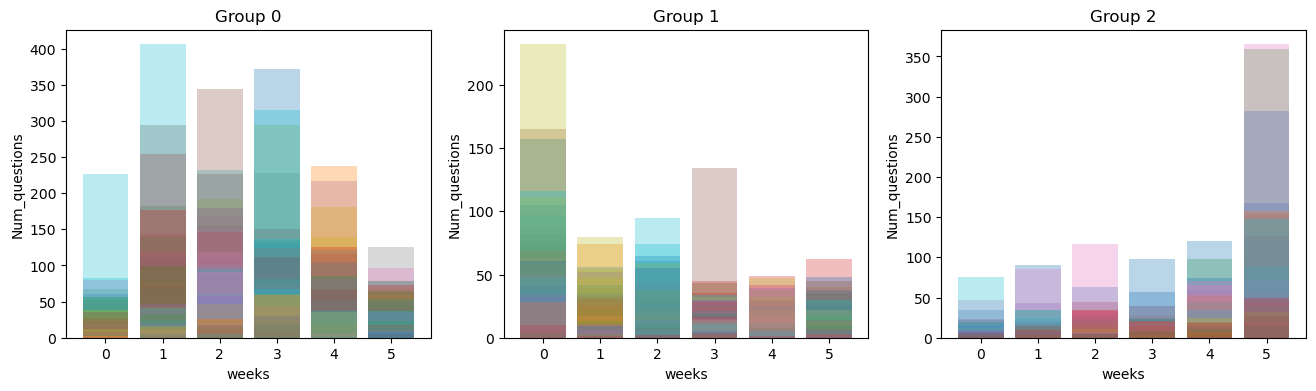

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


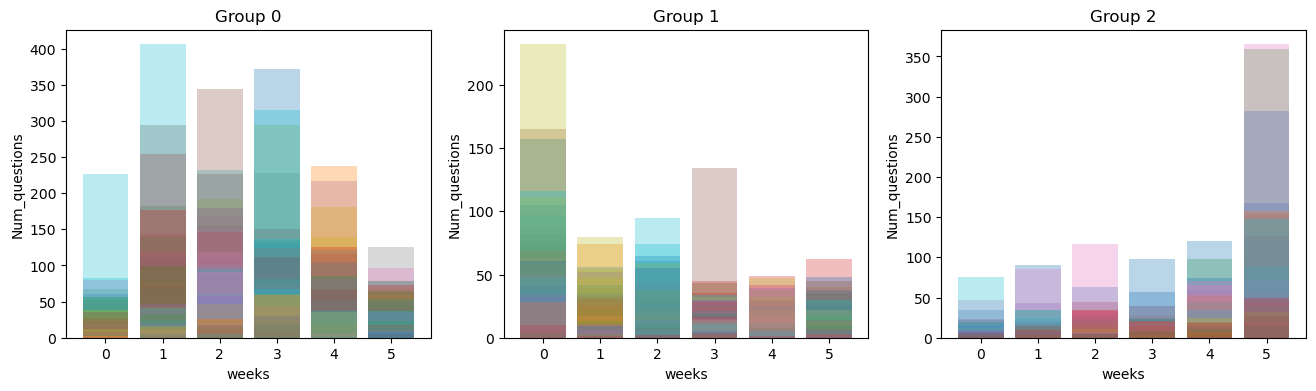

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


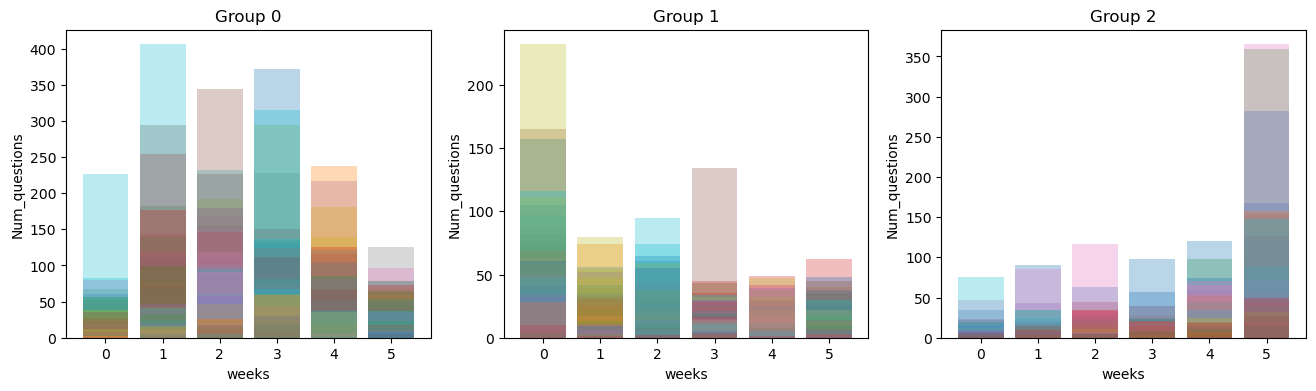

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


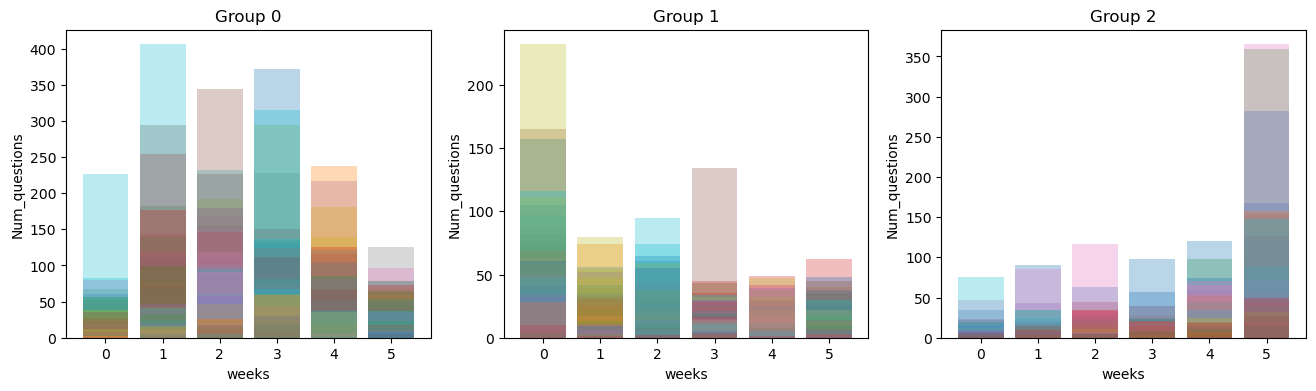

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


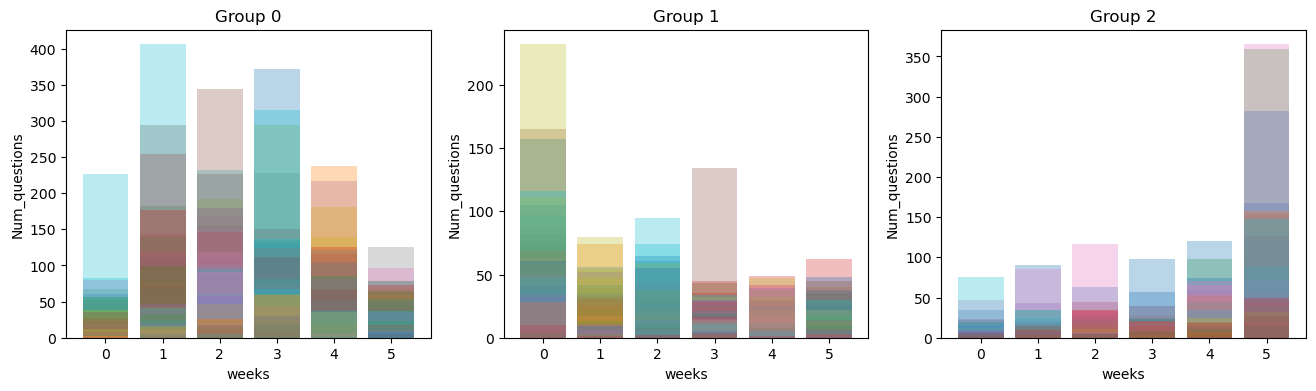

_________________________________________________________


In [19]:
#MATH
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 304 students
Group 1 has 527 students
Group 2 has 193 students


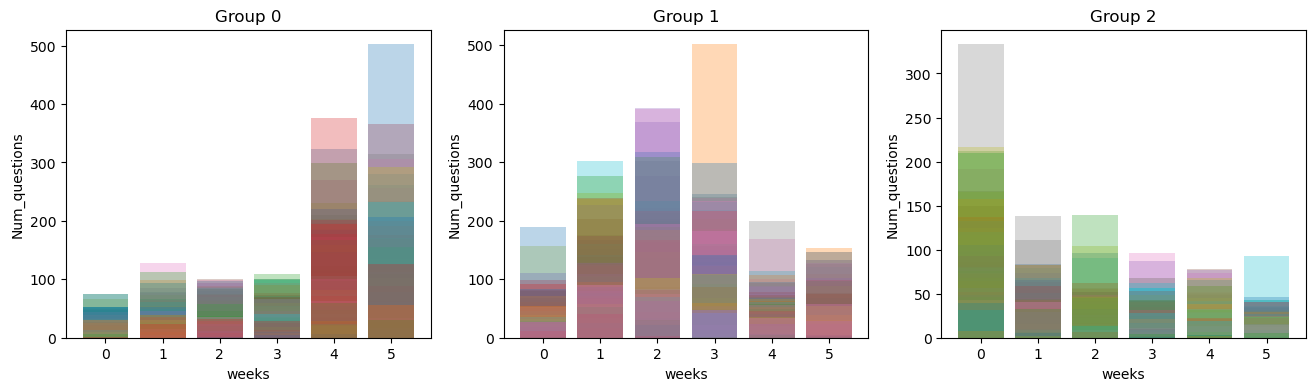

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 188 students
Group 1 has 204 students
Group 2 has 632 students


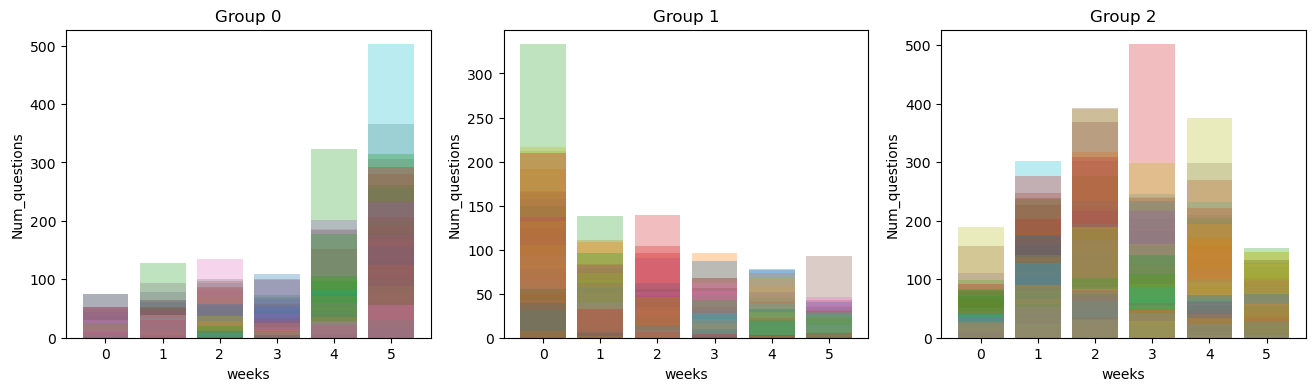

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


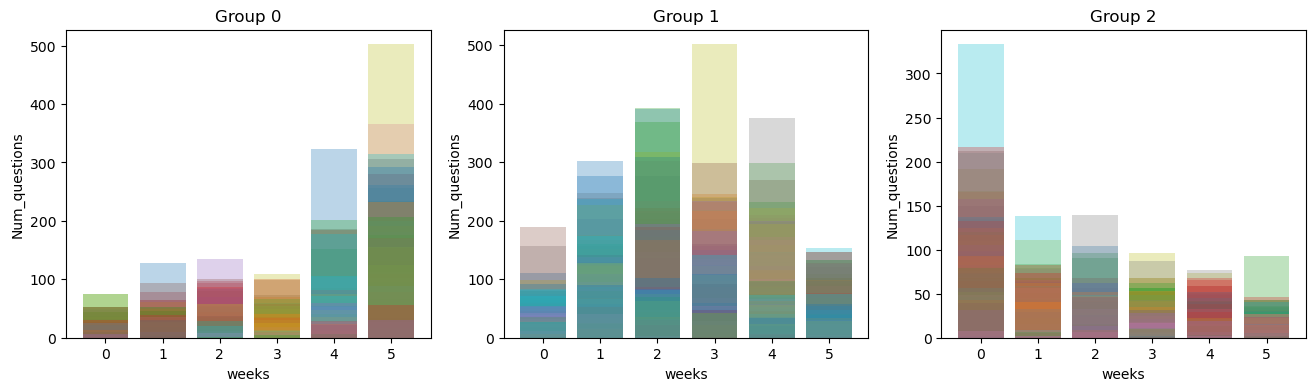

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


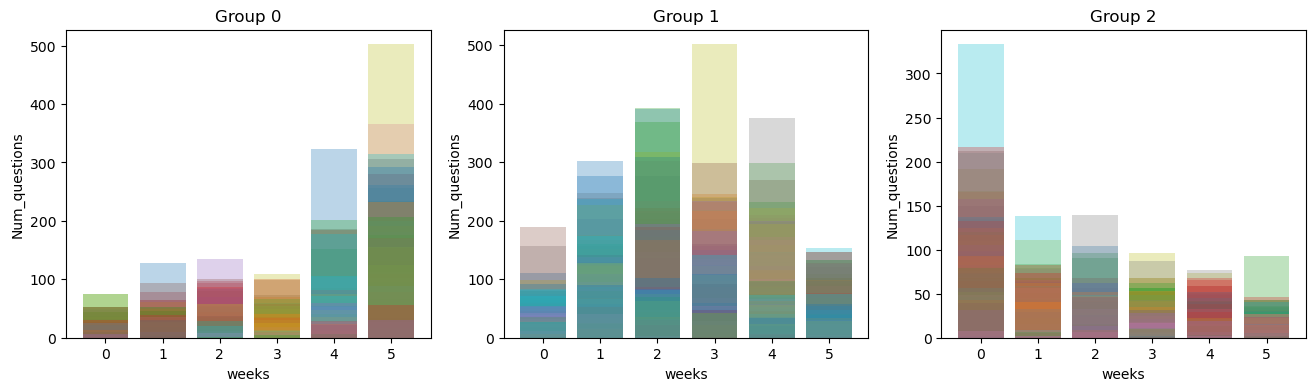

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


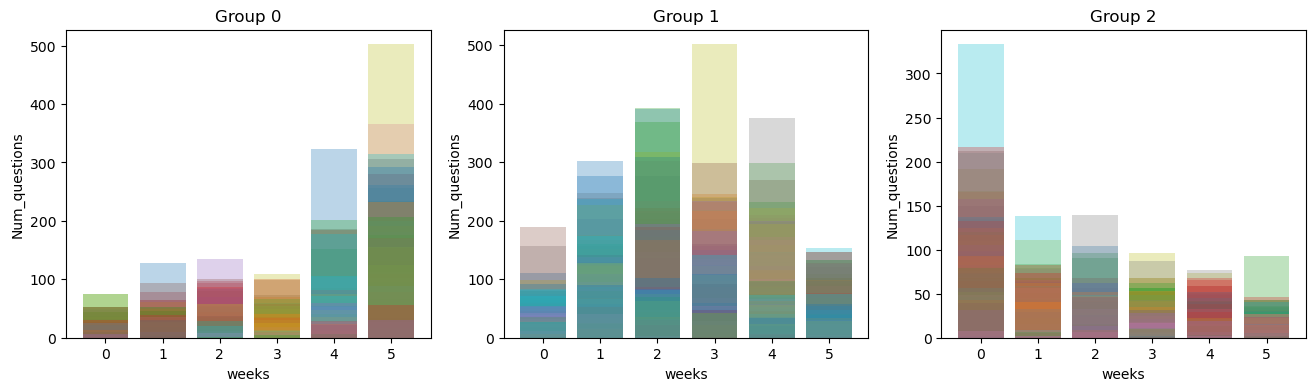

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


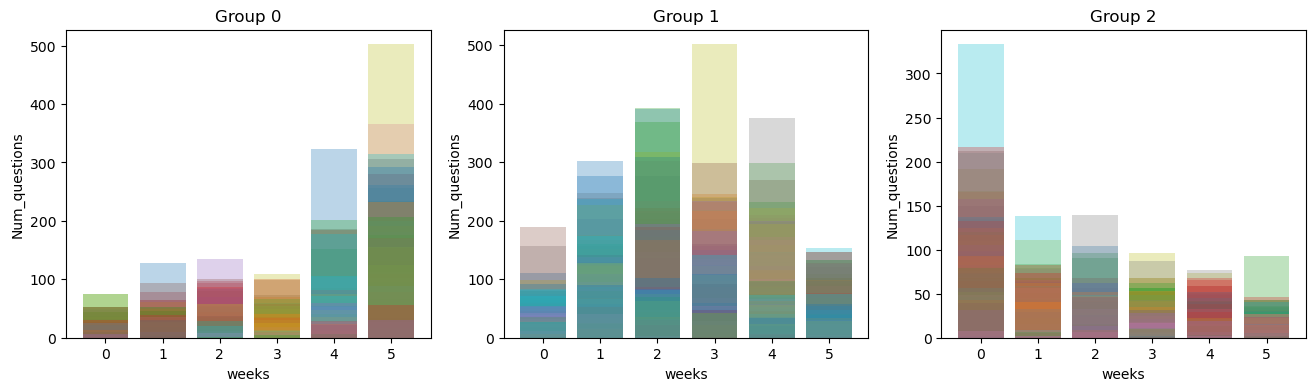

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


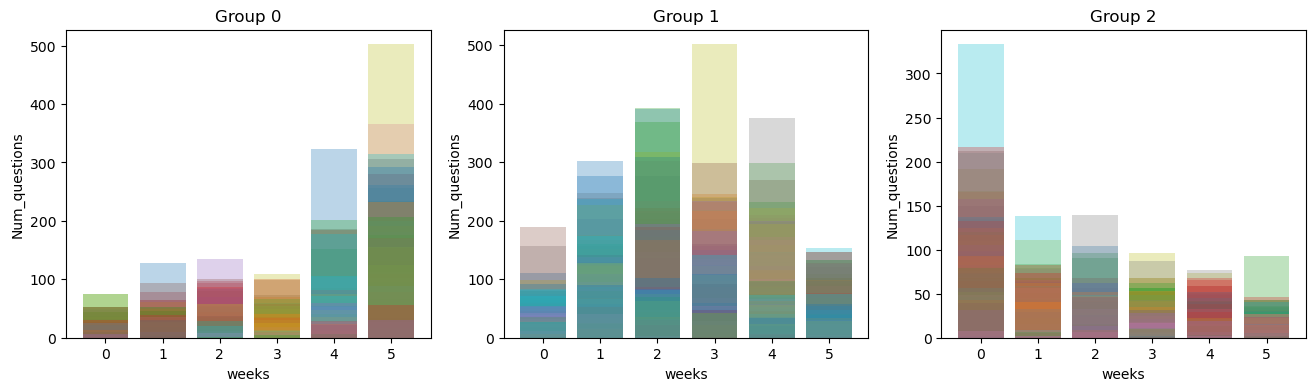

_________________________________________________________


In [24]:
#GERMAN
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 337 students
Group 1 has 293 students
Group 2 has 103 students


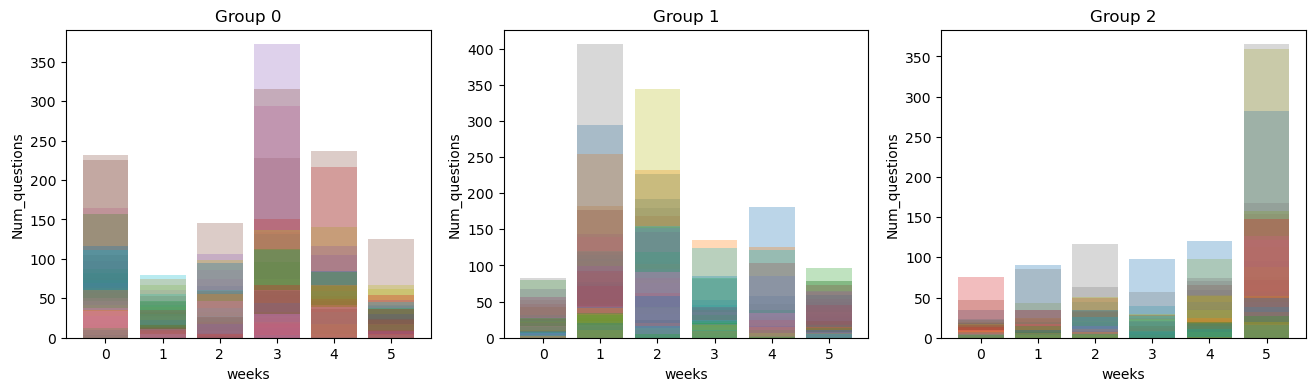

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 444 students
Group 1 has 95 students
Group 2 has 194 students


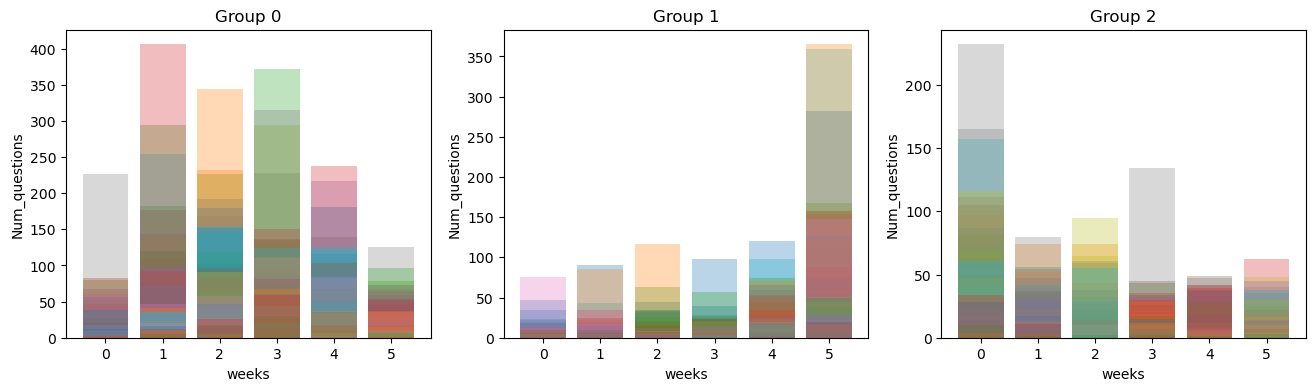

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 446 students
Group 1 has 95 students
Group 2 has 192 students


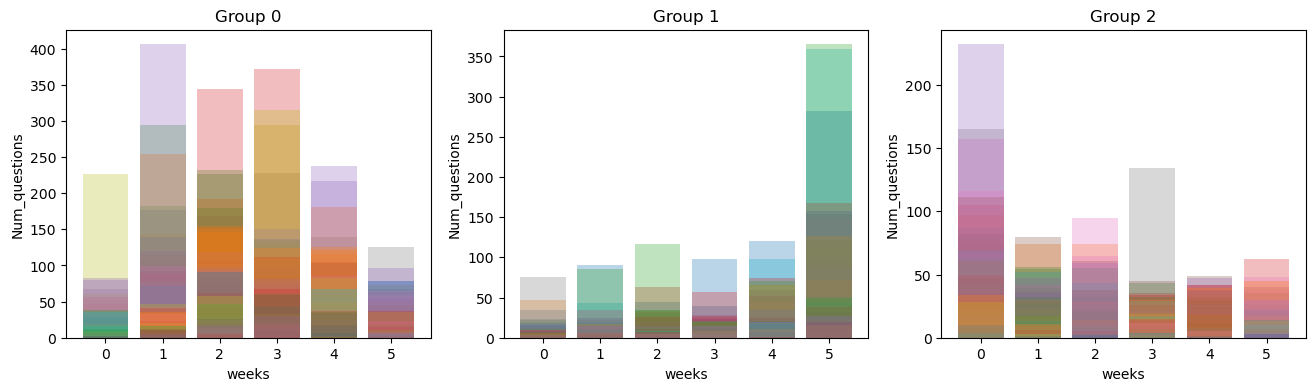

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


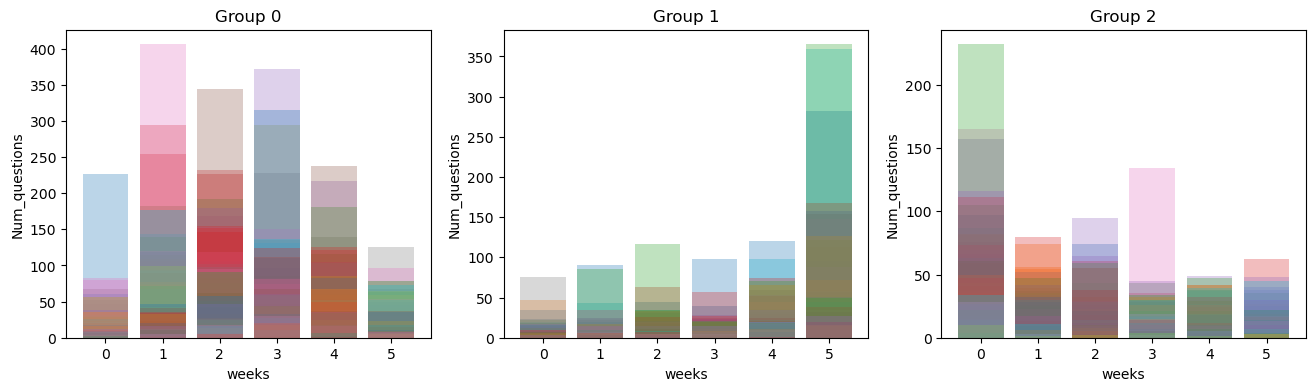

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


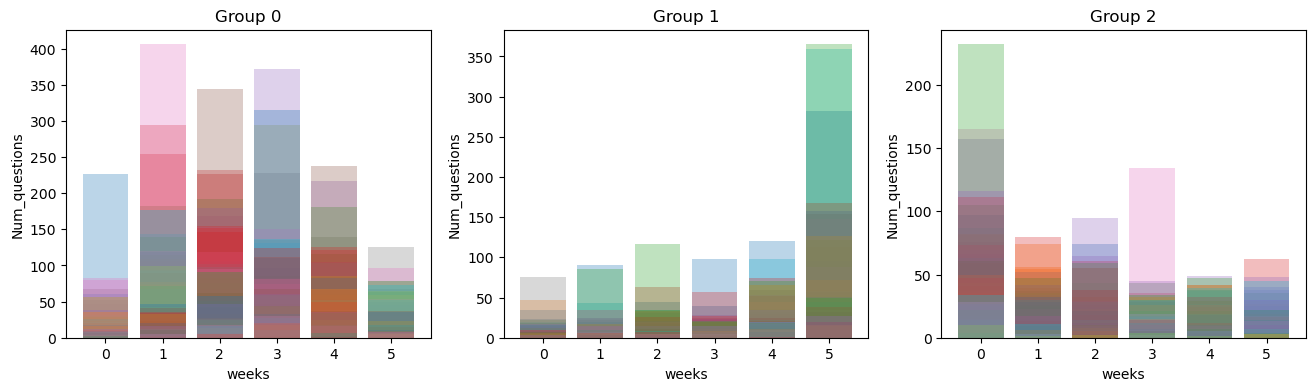

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


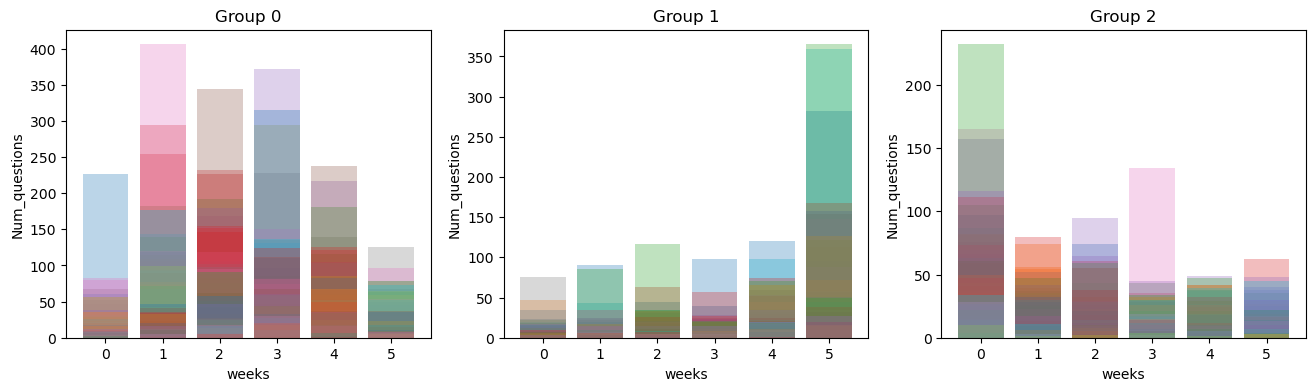

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


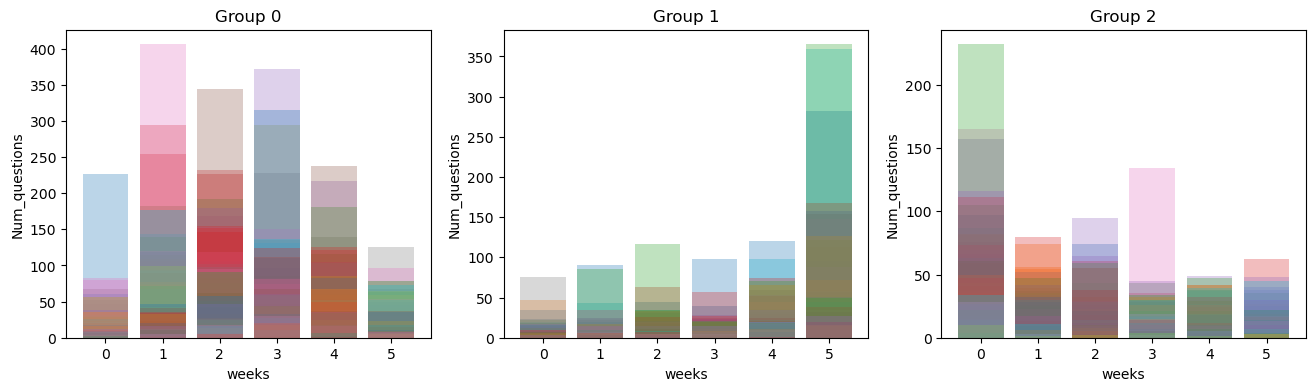

_________________________________________________________


In [23]:
#MATH
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

Now we will add the labels to the data set

First we need to reconstruct the data set that we used for clustering

In [28]:
# from mastery_df_german, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_german = mastery_df_german.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_german = min_6_weeks_german[min_6_weeks_german['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_german = min_6_weeks_german.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_german.user_id.nunique()

1025

In [29]:
# from mastery_df_math, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_math = mastery_df_math.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_math = min_6_weeks_math[min_6_weeks_math['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_math = min_6_weeks_math.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_math.user_id.nunique()

737

Now we have the data set, we cluster with some parameters

In [30]:
gamma = 5
k = 3
window = 1
D = D_for_window_german[window]
S = cluster.get_affinity_matrix(D, gamma)
W = cluster.get_adjacency(S)
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

# merge the labels to min_6_weeks
min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
print(min_6_weeks_german_merged.user_id.nunique())
min_6_weeks_german_merged.head()

1024


,user_id,title,weeks_since_first_transaction,mastery,diligence,num_questions,percentage_correct,num_review,num_view,ratio_window_visible,cluster
0,387604,Deutsch,0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
1,387604,Deutsch,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
2,387604,Deutsch,2,0.0,0.0,0.0,NaN,0.0,1.0,0.909091,1
3,387604,Deutsch,3,0.0,0.0,0.0,NaN,0.0,NaN,0.900000,1
4,387604,Deutsch,4,0.0,0.0,1.0,0.0,0.0,15.0,0.645161,1


The following cell constructs all possible combinations of clustering parameters to experiment on.

In [36]:
import os
gamma_values = [0.1, 2, 5]
k_values = [2, 3, 4]
window_values = [0, 1, 3]
combinations = []

#Create combinations of gamma, k and window variables
for i in gamma_values:
    for j in k_values:
        for k in window_values:
            combinations.append([i,j,k])

The following cell clusters the students using different parameters and saves them as .csv files under /cluster_csv folder

## For German

In [38]:
#Create folder cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for german
    min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/german_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_german_merged.to_csv(path)
    

## For Math

In [39]:
import os
#Create foldeer cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for math
    min_6_weeks_math_merged = min_6_weeks_math.merge(pd.DataFrame({'user_id': user_ids_math, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/math_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_math_merged.to_csv(path)